In [152]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler 

In [169]:
#variables 
SEED = 1161
N_TRAIN = 9
N_VALID = 100
N_TEST  = 100
Ms = np.arange(1,9+1)
lambdas = [-1, 0, np.exp(-18), 1]

In [170]:
#Equations 
def f_opt(x):
    return np.sin(2.0 * np.pi * x)

In [171]:
#Generate the test, vaildation, and training set 
def generate_sets(seed, N_train, N_valid, N_test):
    x_tr = np.linspace(0, 1, N_train)
    x_va = np.linspace(0, 1, N_valid)
    x_te =np.linspace(0, 1, N_test)
    np.random.randn(seed)
    t_tr = f_opt(x_tr) + 0.2*np.random.randn(N_train)
    t_va = f_opt(x_va) + 0.2*np.random.randn(N_valid)
    t_te = f_opt(x_te) + 0.2*np.random.randn(N_test)
    return x_tr, t_tr, x_va, t_va, x_te, t_te

In [172]:
def design_matrix(x, M):
    return np.vstack([x**m for m in range(M + 1)]).T

In [173]:
def fit_least_squares(x, t):
    A=np.dot(x.T, x)
    A1=np.linalg.inv(A)
    b=np.dot(x.T, t)
    w=np.dot(A1,b)
    return w

In [174]:
def rmse(y_true, y_pred):
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))

In [175]:
def standardize (XX_train, XX_valid):
    # Ensure 2D
    XX_train = np.asarray(XX_train)
    XX_valid = np.asarray(XX_valid)
    if XX_train.ndim == 1:
        XX_train = XX_train.reshape(-1, 1)
    if XX_valid.ndim == 1:
        XX_valid = XX_valid.reshape(-1, 1)

    sc = StandardScaler()
    XX_train_std = sc.fit_transform(XX_train)
    XX_valid_std = sc.transform(XX_valid)
    return XX_train_std, XX_valid_std

In [176]:
def L2reg (x_st, lam, t):
    # Build B correctly: diag(0, 2λ, ..., 2λ)  with size P×P
    N, P = X_st.shape
    B = np.zeros((P, P))
    B[1:, 1:] = 2.0 * lam * np.eye(P - 1)   # bias unpenalized
    # 5) Ridge (slide) equation
    A  = np.dot(X_st.T,X_st)                  # (P, P)
    A1 = A + (N / 2.0) * B              # (P, P)
    b  = np.dot(X_st.T, t_tr)                  # (P,)   <-- use the TRUE t_tr
    
    # Use solve (more stable than inverse)
    w_L2 = np.linalg.solve(A1, b)       # (P,)
    return w_L2

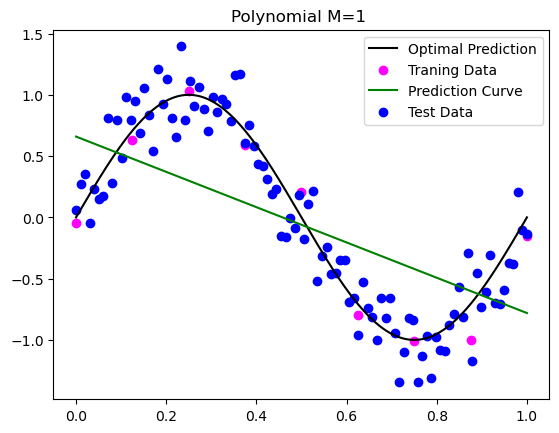

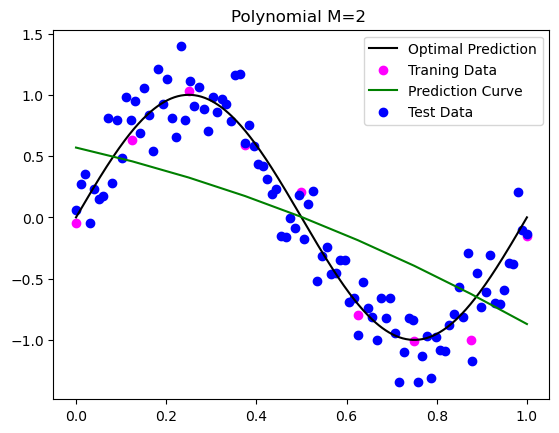

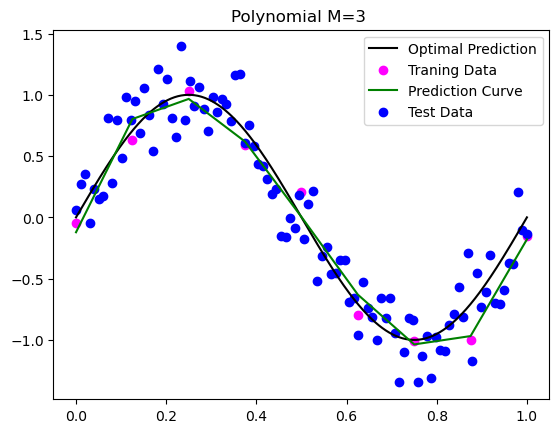

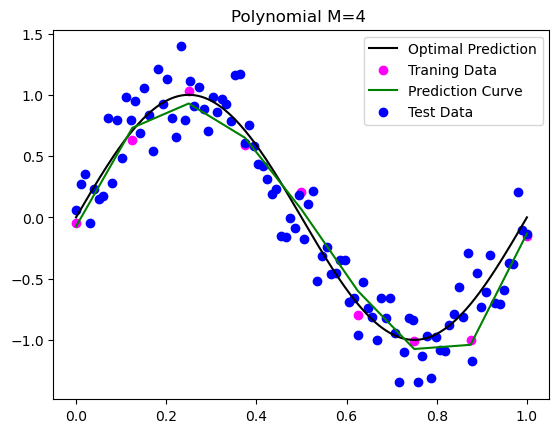

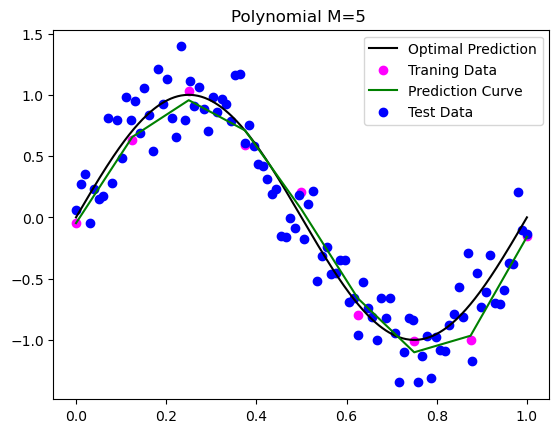

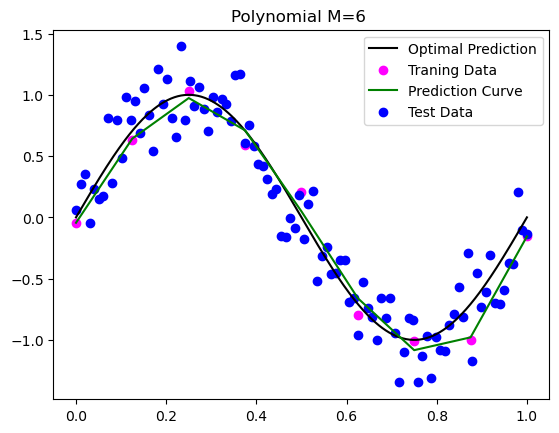

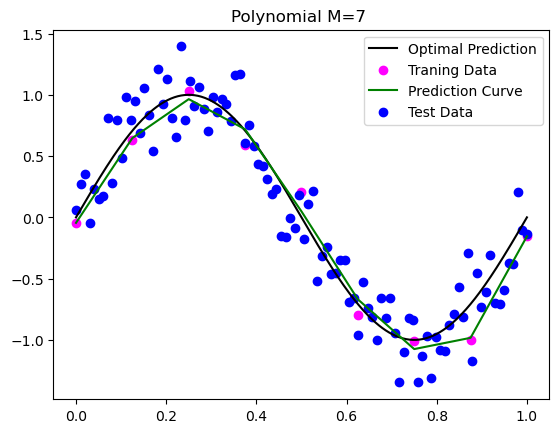

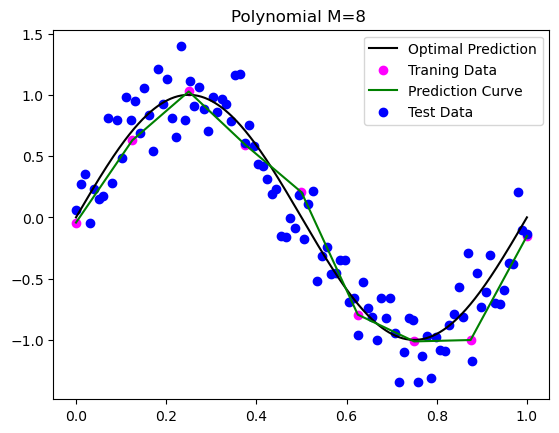

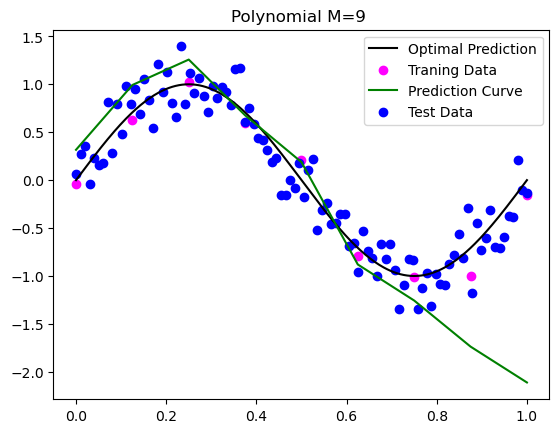

In [181]:
x_tr, t_tr, x_va, t_va, x_te, t_te = generate_sets(SEED, N_TRAIN, N_VALID, N_TEST)
#print(x_te)
#init for in loop
rmse_train_list = []
rmse_valid_list = []
for M in Ms:
    # Design matrices
    w_x_tr = design_matrix(x_tr, M)
    w_x_va = design_matrix(x_va, M)

    w = fit_least_squares(w_x_tr, t_tr)

    # Predictions
    y_tr = np.dot(w_x_tr, w)
    y_va = np.dot(w_x_va, w)

    # RMSE
    r_tr = rmse(t_tr, y_tr)
    r_va = rmse(t_va, y_va)
  #  print(r_tr)


    #plot
    plt.title(f'Polynomial M={M} ')
    x_plot = np.linspace(0.0, 1.0, 400)
    f_opt_plot = np.sin(2 * np.pi * x_plot)
    plt.plot(x_plot, f_opt_plot, color='black', label="Optimal Prediction")
    plt.scatter(x_tr, t_tr, color='magenta', label= "Traning Data")
    plt.plot(x_tr, y_tr, color='green', label = "Prediction Curve") #y_one is predicted values
    plt.scatter(x_te, t_te, color='blue', label = "Test Data") #test data 
    plt.legend()
    plt.show()  

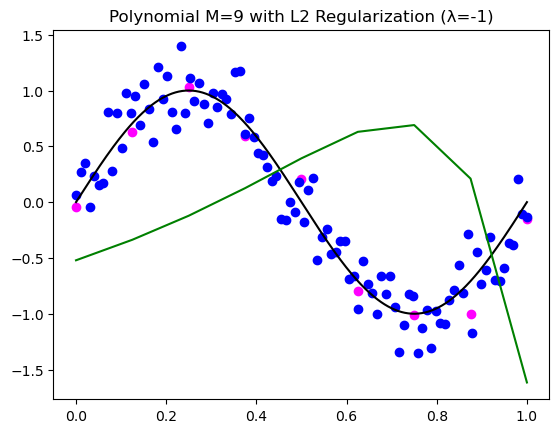

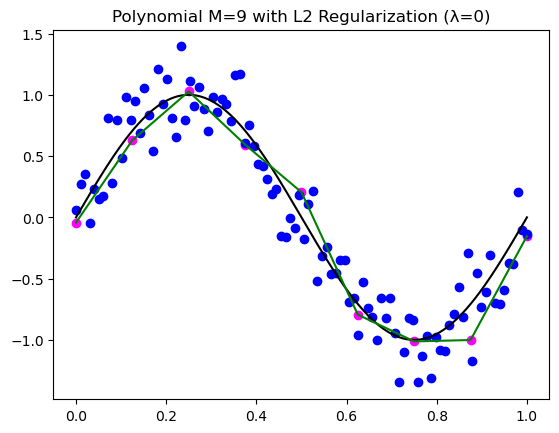

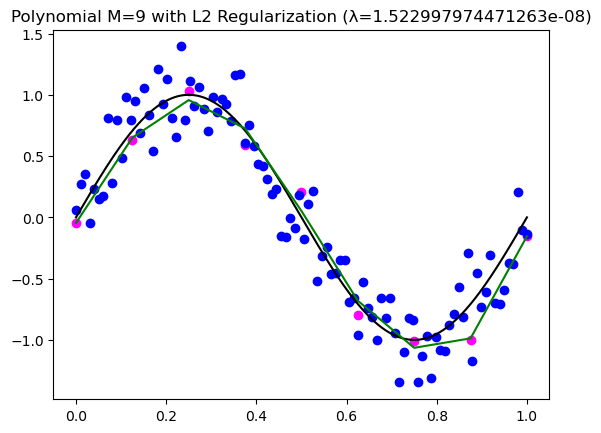

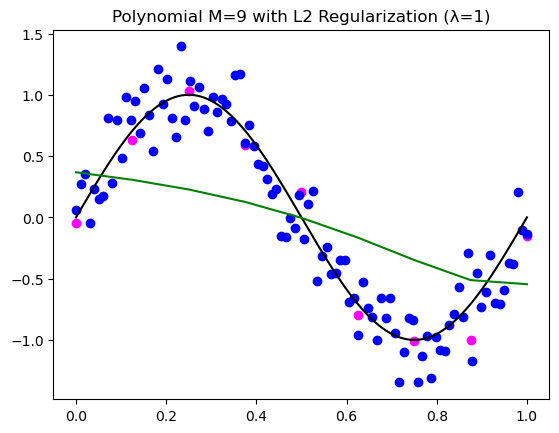

In [182]:
#do lambdas for M=9. in bishops the 3 lambdas are ln(lam) = -infiniti, -18, 0) so (0, e^-18, 1)

Z_tr = design_matrix(x_tr, M)[:, 1:]   # shape (N, M)
Z_va = design_matrix(x_va, M)[:, 1:]   # shape (N_val, M)
# 2) Standardize features (fit on TRAIN only!)
Z_tr_std, Z_va_std = standardize(Z_tr, Z_va)  # returns standardized (N, M) and scaler

# 3) Add bias column AFTER standardization  -> X_st has shape (N, P=M+1)
X_st    = np.hstack([np.ones((Z_tr_std.shape[0], 1)), Z_tr_std])   # (N, 10)
X_st_va = np.hstack([np.ones((Z_va_std.shape[0], 1)), Z_va_std])   # (N_val, 10)
for lam in lambdas:
    #L2
    w_tr_reg = L2reg(x_tr_st, lam,t_tr)
    y_tr_L2 = np.dot(X_st, w_tr_reg)
    y_va_L2 = np.dot(X_st_va, w_L2)
    plt.title(f'Polynomial M={M} with L2 Regularization (λ={lam})')
    x_plot = np.linspace(0.0, 1.0, 400)
    f_opt_plot = np.sin(2 * np.pi * x_plot)
    plt.plot(x_plot, f_opt_plot, color='black')
    plt.scatter(x_tr, t_tr, color='magenta')
    plt.plot(x_tr, y_tr_L2, color='green') #y_one is predicted values
    plt.scatter(x_te, t_te, color='blue') #test data 
    plt.show()